TODO:
read https://www.mdpi.com/2076-3417/11/2/808/htm#B9-applsci-11-00808
train images using cnn
test model
display accuracy
try on different dataset

https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/SMI-ReadMe.html

In [1]:
cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [2]:
cd cosmx-smi-ffpe/


/content/drive/MyDrive/datasets/cosmx-smi-ffpe


In [3]:
cd Lung5_Rep1/Lung5_Rep1-Flat_files_and_images/

/content/drive/MyDrive/datasets/cosmx-smi-ffpe/Lung5_Rep1/Lung5_Rep1-Flat_files_and_images


In [4]:
import pandas as pd
tx=pd.read_csv("Lung5_Rep1_tx_file.csv")


In [5]:
tx

,fov,cell_ID,x_global_px,y_global_px,x_local_px,y_local_px,z,target,CellComp
0,1,0,6757.401589,158836.404167,3568.512700,3619.737500,11,NEAT1,0
1,1,0,5111.388989,156060.200067,1922.500100,843.533400,11,NEAT1,0
2,1,0,7860.460889,157809.338167,4671.572000,2592.671500,11,CCR2,0
3,1,0,3790.488929,155553.883467,601.600040,337.216800,11,HLA-DRA,0
4,1,0,3290.638889,158023.641667,101.750000,2806.975000,11,HLA-DRA,Membrane
...,...,...,...,...,...,...,...,...,...
37226605,30,4760,25902.627814,173480.783610,824.850037,14.116943,7,TPSAB1,Cytoplasm
37226606,30,4760,25924.052741,173477.766764,846.274963,11.100098,1,HSP90AB1,Cytoplasm
37226607,30,4760,25925.769416,173478.008219,847.991638,11.341553,6,GLUL,Cytoplasm
37226608,30,4760,25914.415290,173478.941813,836.637512,12.275146,6,ADGRE2,Cytoplasm


what are the targets?
Each FOV has a CellComposite image that displays the 

*   Each FOV has a CellComposite image that displays the ImmunoFluorescence intesity from the IHC markers selected for the SMI experiment
*   32 cell composite images




In [6]:
# only fov = 1
tx_df=pd.DataFrame(tx)
tx_df=tx_df[tx_df['fov'] == 1]
tx_df=tx_df.loc[:,[tx_df.columns[1]]+list(tx_df.columns[4:])]

In [7]:
tx_df

,cell_ID,x_local_px,y_local_px,z,target,CellComp
0,0,3568.512700,3619.737500,11,NEAT1,0
1,0,1922.500100,843.533400,11,NEAT1,0
2,0,4671.572000,2592.671500,11,CCR2,0
3,0,601.600040,337.216800,11,HLA-DRA,0
4,0,101.750000,2806.975000,11,HLA-DRA,Membrane
...,...,...,...,...,...,...
539342,2408,938.336853,18.726074,5,RORA,Nuclear
539343,2408,919.400024,17.157471,5,DUSP5,Cytoplasm
539344,2408,925.644531,12.455566,5,CD63,Nuclear
539345,2408,926.266724,13.644775,5,CCL5,Nuclear


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch

In [9]:
fov_1=mpimg.imread('./CellComposite/CellComposite_F001.jpg')

In [10]:
import torch 

_x=torch.tensor(fov_1)

In [11]:
_x.permute(2,1,0).unsqueeze(0).shape

torch.Size([1, 3, 5472, 3648])

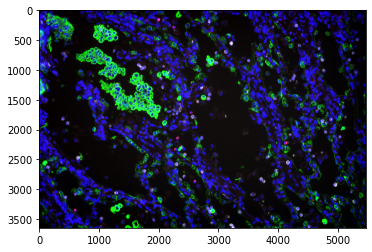

In [12]:
plt.imshow(fov_1)

TODO:

*   image input which compares each pixel to each x and y in tx file to predict target
*   cnn autoencoder (image input and output)
*   predict pixel value by predicting target






https://blog.keras.io/building-autoencoders-in-keras.html
https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [14]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.Conv2d_relu_stack = nn.Sequential(
            nn.Conv2d(3, 32, 7,stride=2),
            nn.ReLU(),
            nn.Conv2d(32, 128, 7,stride=2),
            nn.ReLU(),
            nn.Conv2d(128, 128, 7,stride=2),
            nn.ReLU(),
            nn.Conv2d(128, 128, 7,stride=2),
            nn.ReLU(),

            nn.Conv2d(128, 128, 7,stride=2),
            nn.ReLU(),

            nn.Conv2d(128, 128, 7,stride=2),
            nn.ReLU(),



        )

        self.ConvTranspose2d_relu_stack = nn.Sequential(

            nn.ConvTranspose2d(128, 128, 7,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 128, 7,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 128, 7,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 128, 7,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 32, 7,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 7,stride=2),
            nn.ReLU(),


        )



        # import numpy as np
        # shapes=np.prod([32, 4, 7])
        # self.linear_relu_stack = nn.Sequential(
        #     nn.Flatten(),
        #     nn.Linear(shapes, 512),
        #     nn.ReLU(),
        #     nn.Linear(512, 512),
        #     nn.ReLU(),
        #     nn.Linear(512, 6)
        # )


    def forward(self, x):
        x = torch.div(x, 256)
        x=self.Conv2d_relu_stack(x)
        print(x.shape)
        # logits = self.linear_relu_stack(x)
        logits = self.ConvTranspose2d_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Conv2d_relu_stack): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 128, kernel_size=(7, 7), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (5): ReLU()
    (6): Conv2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (7): ReLU()
    (8): Conv2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (11): ReLU()
  )
  (ConvTranspose2d_relu_stack): Sequential(
    (0): ConvTranspose2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (5): ReLU()
    (6): ConvTranspose2d(128, 128, kernel_size=(7, 7), stride=(2, 2))
    (7): ReLU()
    (8): ConvTranspose2d(128, 32, k

TODO:
make neural network and run model with image
compare each pixel to target 

In [15]:
x=torch.tensor(fov_1).permute(2,0,1).unsqueeze(0)

In [ ]:
y=model(x)

torch.Size([1, 128, 52, 80])


In [ ]:
y.shape

In [ ]:
x.shape

change kernal size so that y.shape matches x.shape